In [64]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
newfont = {"fontname": "serif"}

In [65]:
fig1 = plt.imread("Danial paper 444 QUALITY.png") #The picture backgrounds
fig2 = plt.imread("Danial paper 770 QUALITY.png")
with open("all_catalogue.pickle", "rb") as handle: #unpickling all_catalogue
    catalogue = pkl.load(handle)

In [66]:
lists = catalogue.keys()
sm = cm.colormaps["gist_rainbow"] #colorbar
index = 0 #index trick...
for i in lists: #adding photo-z to catalogue
    catalogue[i]["photo-z"] = red[index]
    index += 1
redshift = np.genfromtxt("photz.zout", skip_header=2, delimiter=None) #getting photometric redshift
redshiftt = np.transpose(redshift)
red = redshiftt[17] #the photometric redshift

In [67]:
museshift = [] #muse catalogue redshifts, lower and upper bounds.
musecompare = []
u68 = np.array([])
l68 = np.array([])
index = 0
for i in lists:
    if "MUSE_data" in catalogue[i].keys():
        museshift.append(catalogue[i]["MUSE_data"]["z_muse"])
        musecompare.append(catalogue[i]["photo-z"])
        u68 = np.append(u68, redshiftt[8][index])
        l68 = np.append(l68, redshiftt[7][index])
        index += 1

In [68]:
M710 = np.array([]) #f770w-f100w
M115 = np.array([]) #f1000w-f1500w
M47 = np.array([]) #f444w-f770w
M710e = np.array([]) #f770w-f100w error
M115e = np.array([]) #f1000w-f1500w error
M47e = np.array([]) #f444w-f770w error

for i in lists:
    M710 = np.append(M710, float(catalogue[i]["f770w"]["MAG_APER"])-float(catalogue[i]["f1000w"]["MAG_APER"]))
    M115 = np.append(M115, float(catalogue[i]["f1000w"]["MAG_APER"])-float(catalogue[i]["f1500w"]["MAG_APER"]))
    M47 = np.append(M47, float(catalogue[i]["f444w"]["MAG_APER"])-float(catalogue[i]["f770w"]["MAG_APER"]))
    M710e = np.append(M710e, np.sqrt((float(catalogue[i]["f770w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f1000w"]["MAGERR_APER"]))**2))
    M115e = np.append(M115e, np.sqrt((float(catalogue[i]["f1000w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f1500w"]["MAGERR_APER"]))**2))
    M47e = np.append(M47e, np.sqrt((float(catalogue[i]["f444w"]["MAGERR_APER"]))**2+(float(catalogue[i]["f770w"]["MAGERR_APER"]))**2))
    #Burde være alt den magnitude data vi har brug for

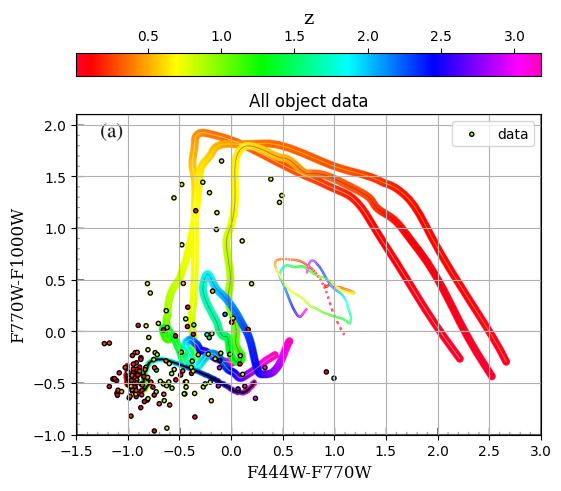

In [89]:
plt.figure(figsize=(6, 10))
implot = plt.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
allplot1 = plt.scatter(M47, M710, c=red, marker=".",  label = "data", cmap=sm, edgecolors="k")
plt.colorbar(allplot1, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
#plt.errorbar(M47, M710, yerr=M710e, xerr=M47e, linestyle = "", color="r", label = "error") #VERY large errors
plt.title("All object data")
plt.xlabel("F444W-F770W", **newfont, fontsize=12)
plt.ylabel("F770W-F1000W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.legend()
plt.grid()

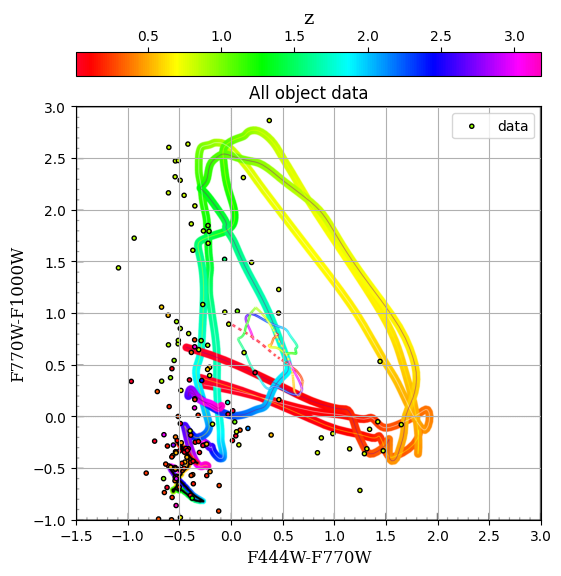

In [92]:
plt.figure(figsize=(6, 8))
implot = plt.imshow(fig2, extent=[-1.5, 3, -1, 3])
allplot2 = plt.scatter(M710, M115, c=red, marker=".",  label = "data", cmap=sm, edgecolors="k")
plt.colorbar(allplot2, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
#plt.errorbar(M710, M115, yerr=M115e, xerr=M710e, linestyle = "", color="r", label = "error") #VERY large errors
plt.title("All object data")
plt.xlabel("F444W-F770W", **newfont, fontsize=12)
plt.ylabel("F770W-F1000W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 3)
plt.legend()
plt.grid()

In [114]:
fictdatlinear = np.array([[-0.5, -0.2], [-0.15, -0.5]]) #angled line fictional data. x then y
fictdathline = np.array([[-1.5, -0.5], np.ones(2)*-0.15]) #horizontal fictional data line. x then y
fictdatvline = np.array([[-0.2, -0.2], [-0.5,-1.5]]) #vertical fictional data line. x then y

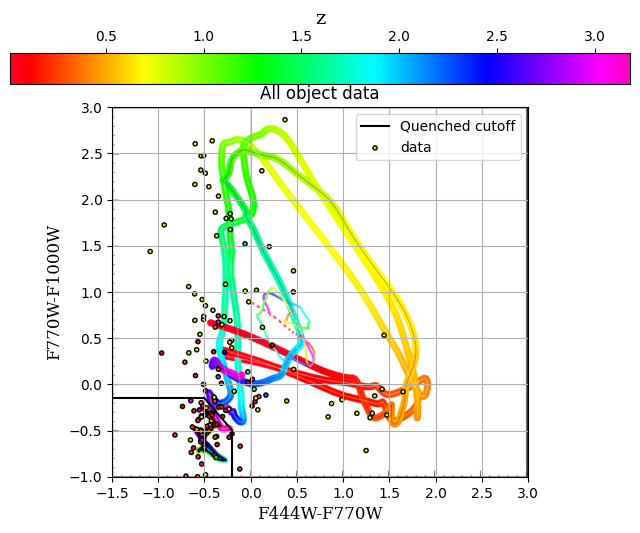

In [115]:
plt.figure(figsize=(8, 6))
plt.plot(fictdatlinear[0], fictdatlinear[1], color="k", label="Quenched cutoff")
plt.plot(fictdathline[0], fictdathline[1], color="k")
plt.plot(fictdatvline[0], fictdatvline[1], color="k")
implot = plt.imshow(fig2, extent=[-1.5, 3, -1, 3])
allplot2 = plt.scatter(M710, M115, c=red, marker=".",  label = "data", cmap=sm, edgecolors="k")
plt.colorbar(allplot2, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
#plt.errorbar(M710, M115, yerr=M115e, xerr=M710e, linestyle = "", color="r", label = "error") #VERY large errors
plt.title("All object data")
plt.xlabel("F444W-F770W", **newfont, fontsize=12)
plt.ylabel("F770W-F1000W", **newfont, fontsize=12)
plt.xlim(-1.5, 3)
plt.ylim(-1, 3)
plt.legend()
plt.grid()

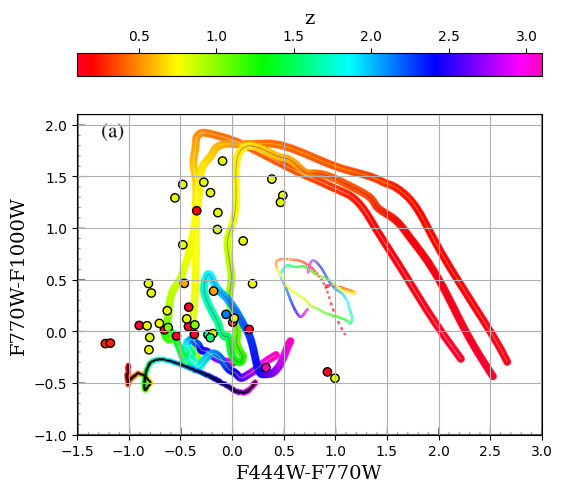

In [71]:
plt.figure(figsize=(6, 10))
implot = plt.imshow(fig1, extent=[-1.5, 3, -1, 2.1])
ww = plt.scatter(M6new, M3new, marker="o", c=newred, vmin=0.1, vmax=3.1, cmap=sm, edgecolors="k")
plt.colorbar(ww, orientation="horizontal", location="top").set_label(label='z',size=14,**newfont)
plt.xlabel("F444W-F770W", **newfont, fontsize=14)
plt.ylabel("F770W-F1000W", **newfont, fontsize=14)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.grid()

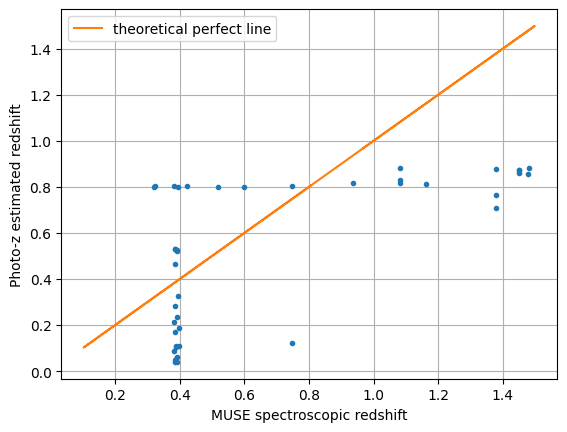

In [72]:
line = np.random.uniform(0.1, 1.5, (1000))
plt.plot(museshift, musecompare, ".")
plt.xlabel("MUSE spectroscopic redshift")
plt.ylabel("Photo-z estimated redshift")
plt.plot(line, line, label="theoretical perfect line")
plt.legend()
plt.grid()

In [73]:
something = 0
outfrac = 0
muse2 = []
phot2 = []
for i in range(len(museshift)):
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) > 0.15:
        something += 1
    if ((museshift[i]-musecompare[i])/(1+museshift[i])) < 0.15:
        muse2.append(museshift[i])
        phot2.append(musecompare[i])
    outfrac = something/len(museshift)

0.4883720930232558


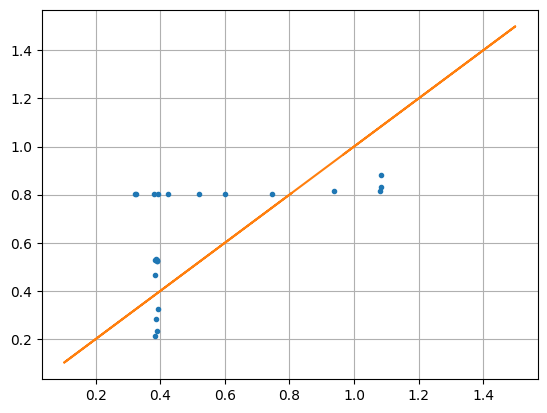

In [74]:
print(outfrac)
plt.plot(muse2, phot2, ".")
plt.plot(line, line)
plt.grid()

In [75]:
musered = []
muse444770 = []
muse7701000 = []
for i in catalogue.keys():
    if "MUSE_data" in catalogue[i].keys():
        musered.append(catalogue[i]["MUSE_data"]["z_muse"])
        muse444770.append(float(catalogue[i]["f444w"]["MAG_APER"])-float(catalogue[i]["f770w"]["MAG_APER"]))
        muse7701000.append(float(catalogue[i]["f770w"]["MAG_APER"])-float(catalogue[i]["f1000w"]["MAG_APER"]))

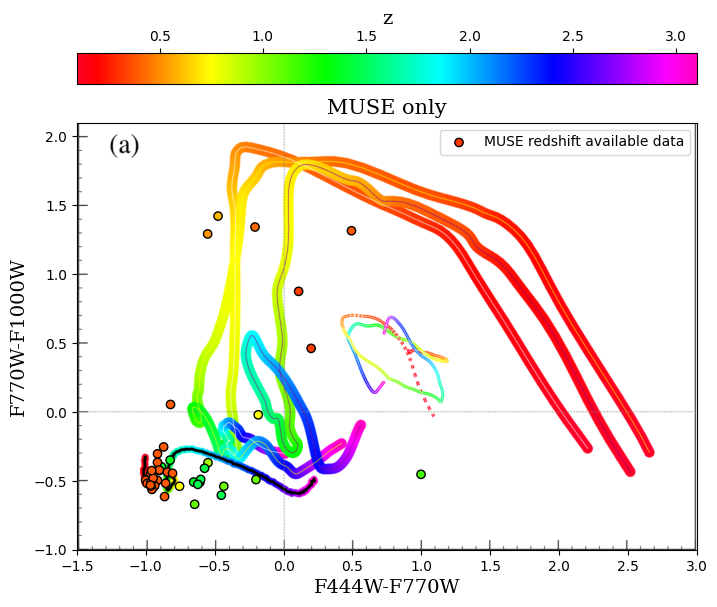

In [76]:
plt.figure(figsize=(8, 10))
implot = plt.imshow(erm, extent=[-1.5, 3, -1, 2.1])#, alpha=0.5)
www = plt.scatter(muse444770, muse7701000, c=musered, marker="o", edgecolor="k", vmin=0.1, vmax=3.1, cmap=sm, label = "MUSE redshift available data")
plt.colorbar(www, orientation="horizontal", location="top").set_label(label="z", **newfont, fontsize=14)
plt.title("MUSE only", **newfont, fontsize=15)
plt.xlabel("F444W-F770W", **newfont, fontsize=14)
plt.ylabel("F770W-F1000W", **newfont, fontsize=14)
plt.xlim(-1.5, 3)
plt.ylim(-1, 2.1)
plt.legend();

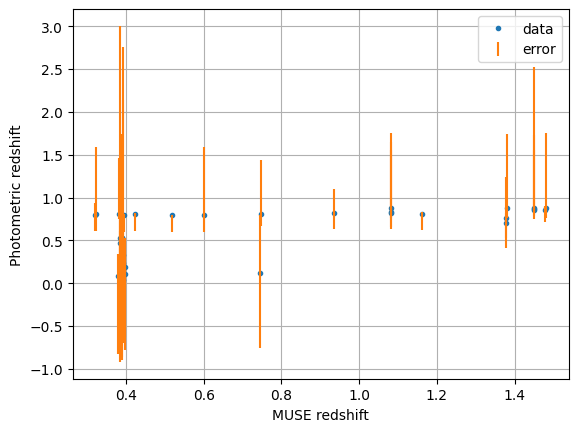

In [77]:
upper_limit = u68 - np.asarray(musecompare)
lower_limit = np.asarray(musecompare) - l68
plt.plot(museshift, musecompare, ".", label="data")
plt.errorbar(museshift, musecompare, yerr=([abs(upper_limit), abs(lower_limit)]), linestyle="", label="error")
plt.xlabel("MUSE redshift")
plt.ylabel("Photometric redshift")
plt.grid()
plt.legend();